In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
import warnings
warnings.filterwarnings('ignore')

In [119]:
mnist = input_data.read_data_sets('/tmp/data/' , one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


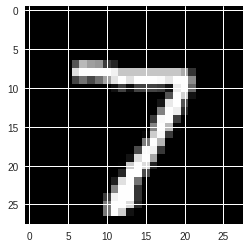

In [120]:
first_image = mnist.test.images[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [0]:
n_nodes_h1 = 500
n_nodes_h2 = 500
n_nodes_h3 = 500

n_classes = 10

batch_size = 100

In [0]:
x = tf.placeholder('float' , [None , 784])
y = tf.placeholder('float')

In [0]:
def ffnn(data):
  
  hidden_layer1 = {'weights':tf.Variable(tf.random_normal([784 , n_nodes_h1])),
                  'biases':tf.Variable(tf.random_normal([n_nodes_h1]))}
  
  hidden_layer2 = {'weights':tf.Variable(tf.random_normal([n_nodes_h1 , n_nodes_h2])),
                  'biases':tf.Variable(tf.random_normal([n_nodes_h2]))}
  
  hidden_layer3 = {'weights':tf.Variable(tf.random_normal([n_nodes_h2 , n_nodes_h3])),
                  'biases':tf.Variable(tf.random_normal([n_nodes_h3]))}
  
  output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_h3 , n_classes])),
                  'biases':tf.Variable(tf.random_normal([n_classes]))}
  
  layer1 = tf.add(tf.matmul(data , hidden_layer1['weights']) , hidden_layer1['biases'])
  layer1 = tf.nn.relu(layer1)
  
  layer2 = tf.add(tf.matmul(layer1, hidden_layer2['weights']) , hidden_layer2['biases'])
  layer2 = tf.nn.relu(layer2)
  
  layer3 = tf.add(tf.matmul(layer2 , hidden_layer3['weights']) , hidden_layer1['biases'])
  layer3 = tf.nn.relu(layer3)
  
  output = tf.add(tf.matmul(layer3 , output_layer['weights']) , output_layer['biases'])
  
  return output


  

In [0]:
def train(x):
  prediction = ffnn(x)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction , labels = y))
  optimizer = tf.train.AdamOptimizer().minimize(cost)
  
  hm_epochs = 10
  
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    
    for epochs in range(hm_epochs):
      epoch_loss = 0
      for _ in range(int(mnist.train.num_examples/batch_size)):
        e_x , e_y = mnist.train.next_batch(batch_size)
        
        _ , c = sess.run([optimizer , cost],feed_dict= {x:e_x ,y:e_y})
        epoch_loss+=c
      print('Epoch' ,epochs ,'completed out of' ,hm_epochs , 'loss:' , epoch_loss)
      correct = tf.equal(tf.argmax(prediction , 1) , tf.argmax(y,1))
      accuracy = tf .reduce_mean(tf.cast(correct , 'float'))
      print('Accuracy:' ,accuracy.eval({x:mnist.test.images , y:mnist.test.labels}))

In [125]:
train(x)

Epoch 0 completed out of 10 loss: 1862530.8177337646
Accuracy: 0.894
Epoch 1 completed out of 10 loss: 387134.32040786743
Accuracy: 0.9163
Epoch 2 completed out of 10 loss: 207481.93899458647
Accuracy: 0.926
Epoch 3 completed out of 10 loss: 121208.73349952698
Accuracy: 0.9323
Epoch 4 completed out of 10 loss: 74430.35915762931
Accuracy: 0.9349
Epoch 5 completed out of 10 loss: 48397.633592065744
Accuracy: 0.9372
Epoch 6 completed out of 10 loss: 30493.713072198705
Accuracy: 0.9372
Epoch 7 completed out of 10 loss: 23007.240636900067
Accuracy: 0.9466
Epoch 8 completed out of 10 loss: 19126.155414283632
Accuracy: 0.949
Epoch 9 completed out of 10 loss: 18649.608503285584
Accuracy: 0.9448
